In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data[[' Liability-Assets Flag',' Net Income Flag','Bankrupt?']].sum()

 Liability-Assets Flag       8
 Net Income Flag          6819
Bankrupt?                  220
dtype: int64

In [4]:
data.shape

(6819, 96)

In [5]:
data = data[data[' Liability-Assets Flag']==0]

In [6]:
data = data.drop(columns=[' Liability-Assets Flag',' Net Income Flag'])

In [7]:
data_1 = data[data['Bankrupt?']==1]
data_0 = data[data['Bankrupt?']==0]

In [8]:
(rows,columns) = data_1.shape

In [9]:
data_0 = data_0.sample(rows,random_state=101)

In [10]:
df = pd.concat([data_1,data_0])

In [11]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,0,0.488958,0.503925,0.536485,0.613384,0.613384,0.998959,0.797302,0.809230,0.303392,...,0.010589,0.778071,0.000361,0.623996,0.613383,0.839001,0.276441,0.026723,0.564813,0.065247
1626,0,0.494613,0.549771,0.543445,0.602091,0.602091,0.998986,0.797405,0.809328,0.303516,...,0.031908,0.804106,0.007002,0.623701,0.602091,0.840783,0.281189,0.027200,0.566564,0.025107
5700,0,0.459660,0.509049,0.512072,0.596009,0.596009,0.998956,0.797344,0.809273,0.303473,...,0.032953,0.783291,0.003149,0.624160,0.596006,0.838869,0.281403,0.026743,0.564918,0.024633
2422,0,0.468191,0.536633,0.519996,0.609586,0.609586,0.999105,0.797460,0.809376,0.303363,...,0.041091,0.798493,0.020706,0.617830,0.609587,0.840434,0.290328,0.027219,0.566611,0.016418


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
X = df.drop(columns=['Bankrupt?'])
y =  df['Bankrupt?']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [15]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.74      0.63        62
           1       0.72      0.51      0.60        80

    accuracy                           0.61       142
   macro avg       0.63      0.63      0.61       142
weighted avg       0.64      0.61      0.61       142



In [17]:
print(confusion_matrix(y_test, y_predict))

[[46 16]
 [39 41]]


In [18]:
# lr = LogisticRegression(solver='liblinear',penalty='l1',max_iter=10000)
# lr.fit(X_train, y_train)
# y_predict = lr.predict(X_test)
# print(classification_report(y_test, y_predict))
# print(confusion_matrix(y_test, y_predict))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
accuracy = np.zeros(100)

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    logmodel = LogisticRegression(max_iter=10000)
    logmodel.fit(X_train,y_train)
    y_predict = logmodel.predict(X_test)
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)

In [20]:
np.mean(accuracy)

0.5997674418604653

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

In [22]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64        65
           1       0.63      0.64      0.64        64

    accuracy                           0.64       129
   macro avg       0.64      0.64      0.64       129
weighted avg       0.64      0.64      0.64       129

[[41 24]
 [23 41]]


Catboost

In [23]:
from catboost import CatBoostClassifier

In [24]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

Learning rate set to 0.006152
0:	learn: 0.6873016	total: 210ms	remaining: 3m 30s
1:	learn: 0.6806180	total: 238ms	remaining: 1m 58s
2:	learn: 0.6755940	total: 275ms	remaining: 1m 31s
3:	learn: 0.6694406	total: 310ms	remaining: 1m 17s
4:	learn: 0.6625551	total: 333ms	remaining: 1m 6s
5:	learn: 0.6572437	total: 355ms	remaining: 58.9s
6:	learn: 0.6523802	total: 378ms	remaining: 53.6s
7:	learn: 0.6473727	total: 400ms	remaining: 49.6s
8:	learn: 0.6421919	total: 428ms	remaining: 47.2s
9:	learn: 0.6368573	total: 467ms	remaining: 46.3s
10:	learn: 0.6316384	total: 499ms	remaining: 44.9s
11:	learn: 0.6272461	total: 526ms	remaining: 43.3s
12:	learn: 0.6227675	total: 551ms	remaining: 41.9s
13:	learn: 0.6178841	total: 582ms	remaining: 41s
14:	learn: 0.6132568	total: 613ms	remaining: 40.2s
15:	learn: 0.6082755	total: 644ms	remaining: 39.6s
16:	learn: 0.6023238	total: 668ms	remaining: 38.6s
17:	learn: 0.5978430	total: 695ms	remaining: 37.9s
18:	learn: 0.5942333	total: 718ms	remaining: 37.1s
19:	learn

165:	learn: 0.2495842	total: 5.22s	remaining: 26.2s
166:	learn: 0.2482283	total: 5.26s	remaining: 26.2s
167:	learn: 0.2473698	total: 5.28s	remaining: 26.2s
168:	learn: 0.2464250	total: 5.31s	remaining: 26.1s
169:	learn: 0.2457222	total: 5.34s	remaining: 26.1s
170:	learn: 0.2445720	total: 5.36s	remaining: 26s
171:	learn: 0.2436295	total: 5.39s	remaining: 25.9s
172:	learn: 0.2425811	total: 5.41s	remaining: 25.9s
173:	learn: 0.2411203	total: 5.45s	remaining: 25.9s
174:	learn: 0.2402785	total: 5.47s	remaining: 25.8s
175:	learn: 0.2395960	total: 5.5s	remaining: 25.7s
176:	learn: 0.2383597	total: 5.52s	remaining: 25.7s
177:	learn: 0.2374647	total: 5.55s	remaining: 25.7s
178:	learn: 0.2367497	total: 5.59s	remaining: 25.6s
179:	learn: 0.2359640	total: 5.62s	remaining: 25.6s
180:	learn: 0.2349242	total: 5.64s	remaining: 25.5s
181:	learn: 0.2340761	total: 5.67s	remaining: 25.5s
182:	learn: 0.2329395	total: 5.7s	remaining: 25.5s
183:	learn: 0.2320809	total: 5.75s	remaining: 25.5s
184:	learn: 0.23

329:	learn: 0.1445946	total: 9.65s	remaining: 19.6s
330:	learn: 0.1441489	total: 9.68s	remaining: 19.6s
331:	learn: 0.1438457	total: 9.7s	remaining: 19.5s
332:	learn: 0.1433568	total: 9.72s	remaining: 19.5s
333:	learn: 0.1430166	total: 9.75s	remaining: 19.4s
334:	learn: 0.1427436	total: 9.77s	remaining: 19.4s
335:	learn: 0.1423219	total: 9.79s	remaining: 19.4s
336:	learn: 0.1416620	total: 9.81s	remaining: 19.3s
337:	learn: 0.1413199	total: 9.84s	remaining: 19.3s
338:	learn: 0.1408474	total: 9.87s	remaining: 19.2s
339:	learn: 0.1403935	total: 9.89s	remaining: 19.2s
340:	learn: 0.1398820	total: 9.91s	remaining: 19.2s
341:	learn: 0.1394665	total: 9.93s	remaining: 19.1s
342:	learn: 0.1389507	total: 9.96s	remaining: 19.1s
343:	learn: 0.1384777	total: 9.98s	remaining: 19s
344:	learn: 0.1380659	total: 10s	remaining: 19s
345:	learn: 0.1378263	total: 10s	remaining: 19s
346:	learn: 0.1373467	total: 10.1s	remaining: 18.9s
347:	learn: 0.1369504	total: 10.1s	remaining: 18.9s
348:	learn: 0.1365085	t

491:	learn: 0.0981372	total: 13.5s	remaining: 14s
492:	learn: 0.0978826	total: 13.6s	remaining: 13.9s
493:	learn: 0.0976680	total: 13.6s	remaining: 13.9s
494:	learn: 0.0975094	total: 13.6s	remaining: 13.9s
495:	learn: 0.0972282	total: 13.6s	remaining: 13.9s
496:	learn: 0.0970411	total: 13.7s	remaining: 13.8s
497:	learn: 0.0968435	total: 13.7s	remaining: 13.8s
498:	learn: 0.0966563	total: 13.7s	remaining: 13.8s
499:	learn: 0.0964409	total: 13.7s	remaining: 13.7s
500:	learn: 0.0963205	total: 13.8s	remaining: 13.7s
501:	learn: 0.0961699	total: 13.8s	remaining: 13.7s
502:	learn: 0.0958987	total: 13.8s	remaining: 13.6s
503:	learn: 0.0956848	total: 13.8s	remaining: 13.6s
504:	learn: 0.0955304	total: 13.8s	remaining: 13.6s
505:	learn: 0.0954175	total: 13.9s	remaining: 13.5s
506:	learn: 0.0952190	total: 13.9s	remaining: 13.5s
507:	learn: 0.0949665	total: 13.9s	remaining: 13.5s
508:	learn: 0.0947048	total: 13.9s	remaining: 13.4s
509:	learn: 0.0944633	total: 14s	remaining: 13.4s
510:	learn: 0.09

651:	learn: 0.0730816	total: 17.4s	remaining: 9.27s
652:	learn: 0.0729284	total: 17.4s	remaining: 9.24s
653:	learn: 0.0727613	total: 17.4s	remaining: 9.21s
654:	learn: 0.0726904	total: 17.4s	remaining: 9.19s
655:	learn: 0.0726107	total: 17.5s	remaining: 9.16s
656:	learn: 0.0725796	total: 17.5s	remaining: 9.13s
657:	learn: 0.0724525	total: 17.5s	remaining: 9.1s
658:	learn: 0.0724031	total: 17.5s	remaining: 9.07s
659:	learn: 0.0723355	total: 17.6s	remaining: 9.05s
660:	learn: 0.0722057	total: 17.6s	remaining: 9.02s
661:	learn: 0.0721703	total: 17.6s	remaining: 8.99s
662:	learn: 0.0720734	total: 17.6s	remaining: 8.96s
663:	learn: 0.0719932	total: 17.7s	remaining: 8.93s
664:	learn: 0.0718159	total: 17.7s	remaining: 8.9s
665:	learn: 0.0716884	total: 17.7s	remaining: 8.88s
666:	learn: 0.0715101	total: 17.7s	remaining: 8.85s
667:	learn: 0.0714311	total: 17.7s	remaining: 8.82s
668:	learn: 0.0714046	total: 17.8s	remaining: 8.79s
669:	learn: 0.0713866	total: 17.8s	remaining: 8.76s
670:	learn: 0.

815:	learn: 0.0566959	total: 21.8s	remaining: 4.91s
816:	learn: 0.0565994	total: 21.8s	remaining: 4.88s
817:	learn: 0.0564499	total: 21.8s	remaining: 4.86s
818:	learn: 0.0563721	total: 21.9s	remaining: 4.83s
819:	learn: 0.0563260	total: 21.9s	remaining: 4.8s
820:	learn: 0.0563145	total: 21.9s	remaining: 4.78s
821:	learn: 0.0561797	total: 21.9s	remaining: 4.75s
822:	learn: 0.0560913	total: 22s	remaining: 4.73s
823:	learn: 0.0560192	total: 22s	remaining: 4.7s
824:	learn: 0.0560004	total: 22s	remaining: 4.67s
825:	learn: 0.0559075	total: 22s	remaining: 4.64s
826:	learn: 0.0558922	total: 22.1s	remaining: 4.62s
827:	learn: 0.0558706	total: 22.1s	remaining: 4.59s
828:	learn: 0.0556970	total: 22.1s	remaining: 4.56s
829:	learn: 0.0556583	total: 22.2s	remaining: 4.54s
830:	learn: 0.0555907	total: 22.2s	remaining: 4.51s
831:	learn: 0.0554964	total: 22.2s	remaining: 4.49s
832:	learn: 0.0553769	total: 22.2s	remaining: 4.46s
833:	learn: 0.0552766	total: 22.3s	remaining: 4.43s
834:	learn: 0.0552302	

976:	learn: 0.0455890	total: 26.4s	remaining: 621ms
977:	learn: 0.0455715	total: 26.4s	remaining: 594ms
978:	learn: 0.0454753	total: 26.4s	remaining: 567ms
979:	learn: 0.0454632	total: 26.5s	remaining: 540ms
980:	learn: 0.0453718	total: 26.5s	remaining: 513ms
981:	learn: 0.0452792	total: 26.5s	remaining: 486ms
982:	learn: 0.0452684	total: 26.5s	remaining: 459ms
983:	learn: 0.0452096	total: 26.6s	remaining: 432ms
984:	learn: 0.0451648	total: 26.6s	remaining: 405ms
985:	learn: 0.0450822	total: 26.6s	remaining: 378ms
986:	learn: 0.0450115	total: 26.7s	remaining: 351ms
987:	learn: 0.0449728	total: 26.7s	remaining: 324ms
988:	learn: 0.0449566	total: 26.7s	remaining: 297ms
989:	learn: 0.0448390	total: 26.8s	remaining: 270ms
990:	learn: 0.0448297	total: 26.8s	remaining: 243ms
991:	learn: 0.0447685	total: 26.8s	remaining: 216ms
992:	learn: 0.0447556	total: 26.8s	remaining: 189ms
993:	learn: 0.0447394	total: 26.9s	remaining: 162ms
994:	learn: 0.0446587	total: 26.9s	remaining: 135ms
995:	learn: 

In [25]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        65
           1       0.83      0.97      0.89        64

    accuracy                           0.88       129
   macro avg       0.89      0.88      0.88       129
weighted avg       0.90      0.88      0.88       129

[[52 13]
 [ 2 62]]


Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        65
           1       0.80      0.88      0.84        64

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129

[[51 14]
 [ 8 56]]


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.82      0.92      0.87        64

    accuracy                           0.86       129
   macro avg       0.87      0.86      0.86       129
weighted avg       0.87      0.86      0.86       129

[[52 13]
 [ 5 59]]


SVC

In [29]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf',C = 1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        65
           1       0.63      0.59      0.61        64

    accuracy                           0.63       129
   macro avg       0.63      0.63      0.63       129
weighted avg       0.63      0.63      0.63       129

[[43 22]
 [26 38]]


Neural Network

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=10000).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        65
           1       0.49      0.64      0.56        64

    accuracy                           0.50       129
   macro avg       0.50      0.50      0.49       129
weighted avg       0.50      0.50      0.49       129

[[23 42]
 [23 41]]


Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67        65
           1       0.67      0.03      0.06        64

    accuracy                           0.51       129
   macro avg       0.59      0.51      0.36       129
weighted avg       0.59      0.51      0.37       129

[[64  1]
 [62  2]]


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 

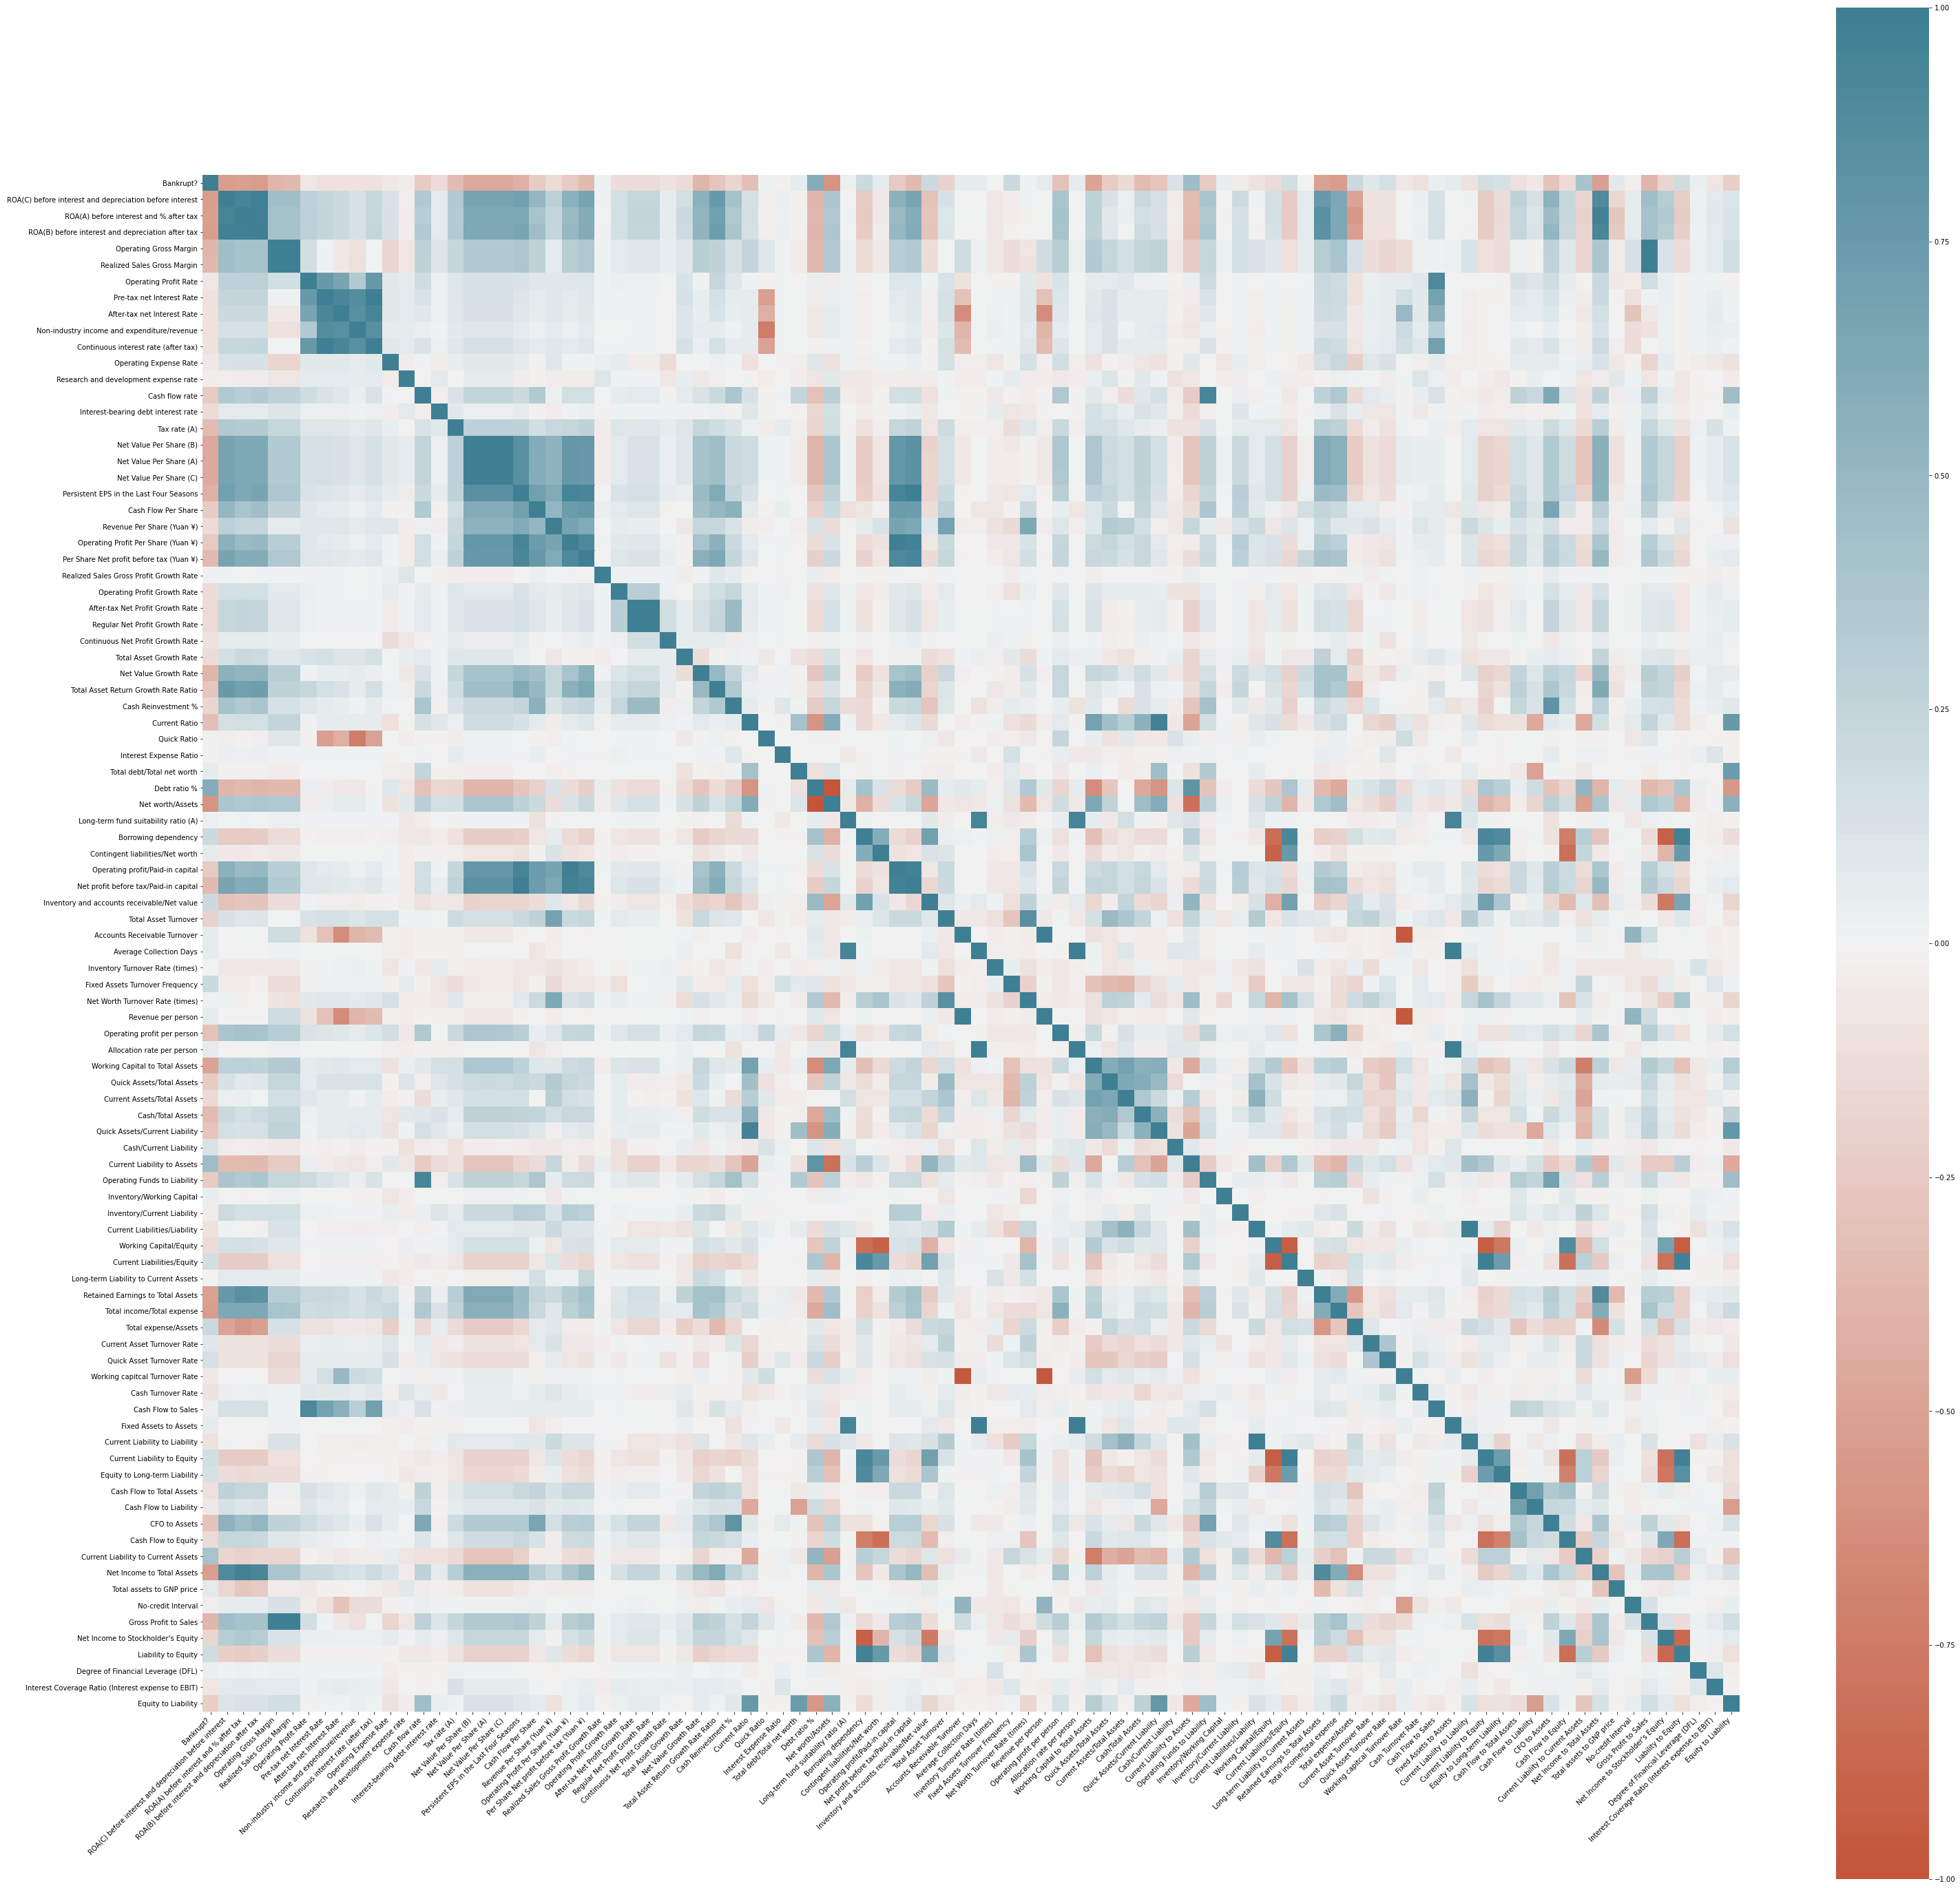

In [32]:
corr = df.corr()
plt.figure(figsize=(50,50))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("Correlation.pdf")

In [33]:
from sklearn.metrics import f1_score

In [34]:
data_1 = data[data['Bankrupt?']==1]
data_0 = data[data['Bankrupt?']==0]
(rows,columns) = data_1.shape

In [35]:
accuracy = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    logmodel = LogisticRegression(max_iter=1000)
    logmodel.fit(X_train,y_train)
    y_predict = logmodel.predict(X_test)
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)

In [36]:
np.mean(accuracy)

0.5703875968992249

In [37]:
f1 = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    y_predict = rfc.predict(X_test)
    f1[i]=f1_score(y_test, y_predict, average='macro')

In [38]:
np.mean(f1)

0.8575981345245581